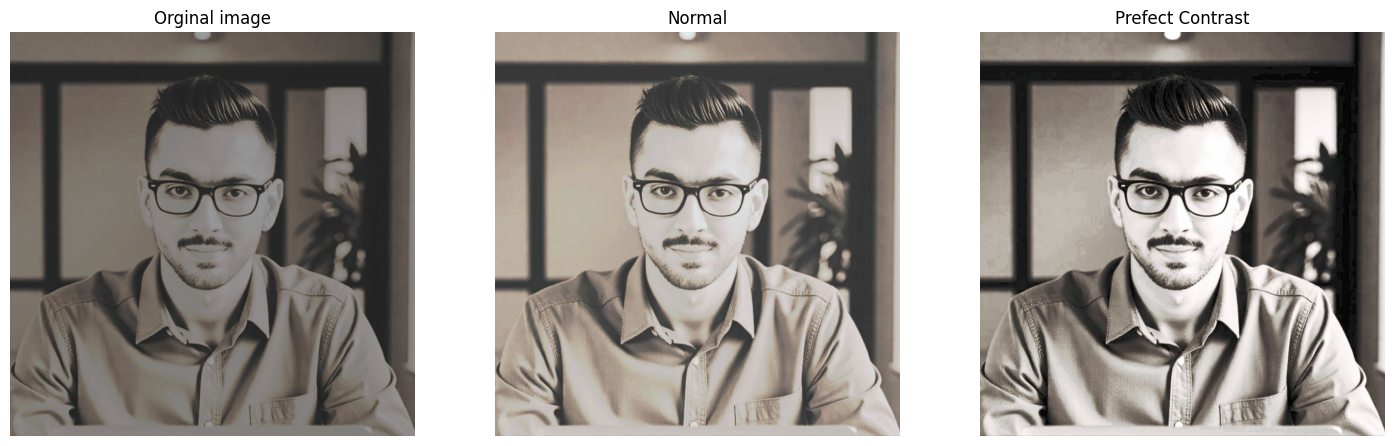

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, io
from skimage.util import view_as_blocks

img = cv2.imread("/content/Mahan.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def linear_contrast(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


def hist_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)


def clahe_enhancement(image, clip=2.0, tile=(8,8)):
    img_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(img_lab)
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    l2 = clahe.apply(l)
    img_lab = cv2.merge((l2,a,b))
    return cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)


normal_contrast    = linear_contrast(img, alpha=1.5)
prefect_contrast = hist_equalization(img)



titles = ["Orginal image", "Normal", "Prefect Contrast" ]
images = [img, normal_contrast, prefect_contrast]

plt.figure(figsize=(24,12))
for i in range(3):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


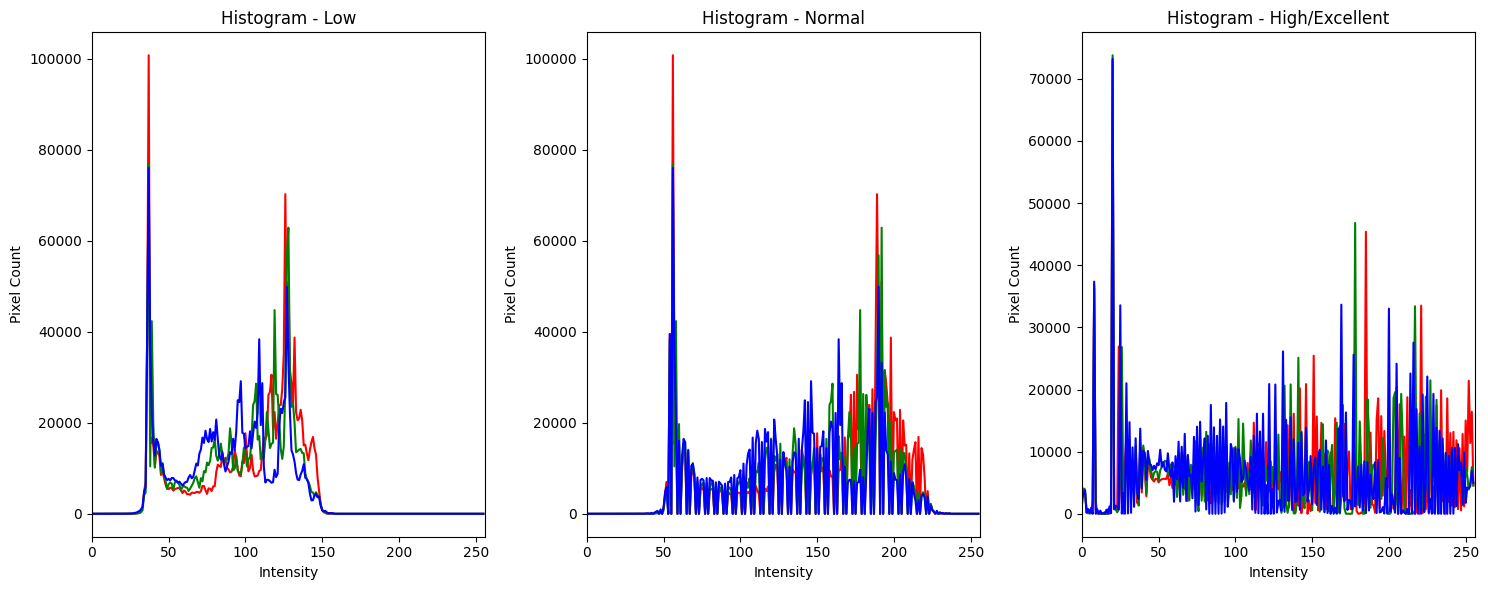

In [41]:

def plot_histograms(images, titles):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(15,6))

    for i, img in enumerate(images):
        plt.subplot(1, 3, i+1)
        for j, col in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0,256])
            plt.plot(hist, color=col)
            plt.xlim([0,256])
        plt.title(f"Histogram - {titles[i]}")
        plt.xlabel("Intensity")
        plt.ylabel("Pixel Count")

    plt.tight_layout()
    plt.show()


plot_histograms(
    [img , normal_contrast, prefect_contrast],
    ["Low", "Normal", "High/Excellent"]
)


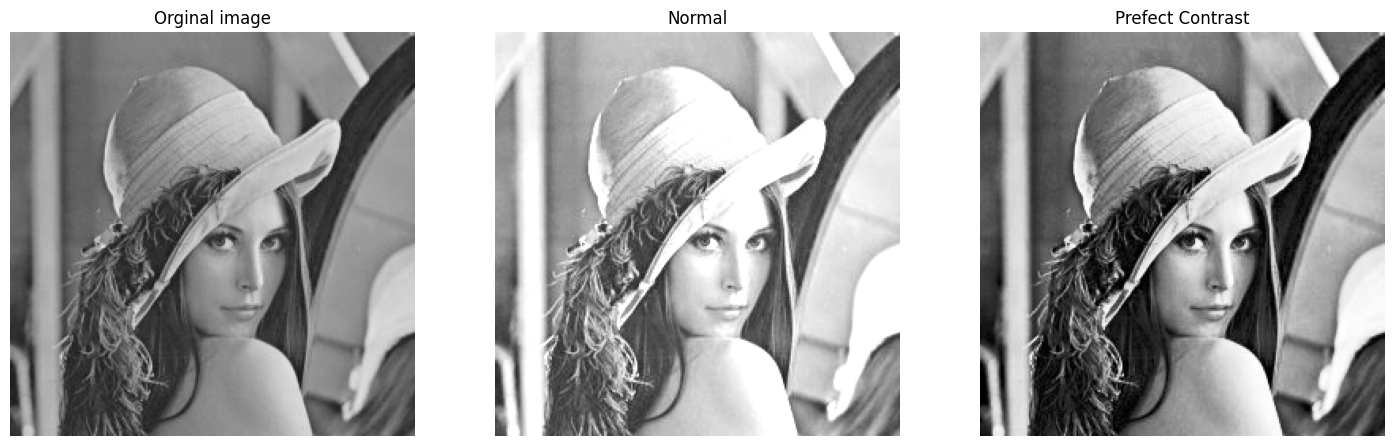

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, io
from skimage.util import view_as_blocks

img = cv2.imread("/content/Lena.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def linear_contrast(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


def hist_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)


def clahe_enhancement(image, clip=2.0, tile=(8,8)):
    img_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(img_lab)
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=tile)
    l2 = clahe.apply(l)
    img_lab = cv2.merge((l2,a,b))
    return cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)


normal_contrast    = linear_contrast(img, alpha=1.5)
prefect_contrast = hist_equalization(img)



titles = ["Orginal image", "Normal", "Prefect Contrast" ]
images = [img, normal_contrast, prefect_contrast]

plt.figure(figsize=(24,12))
for i in range(3):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


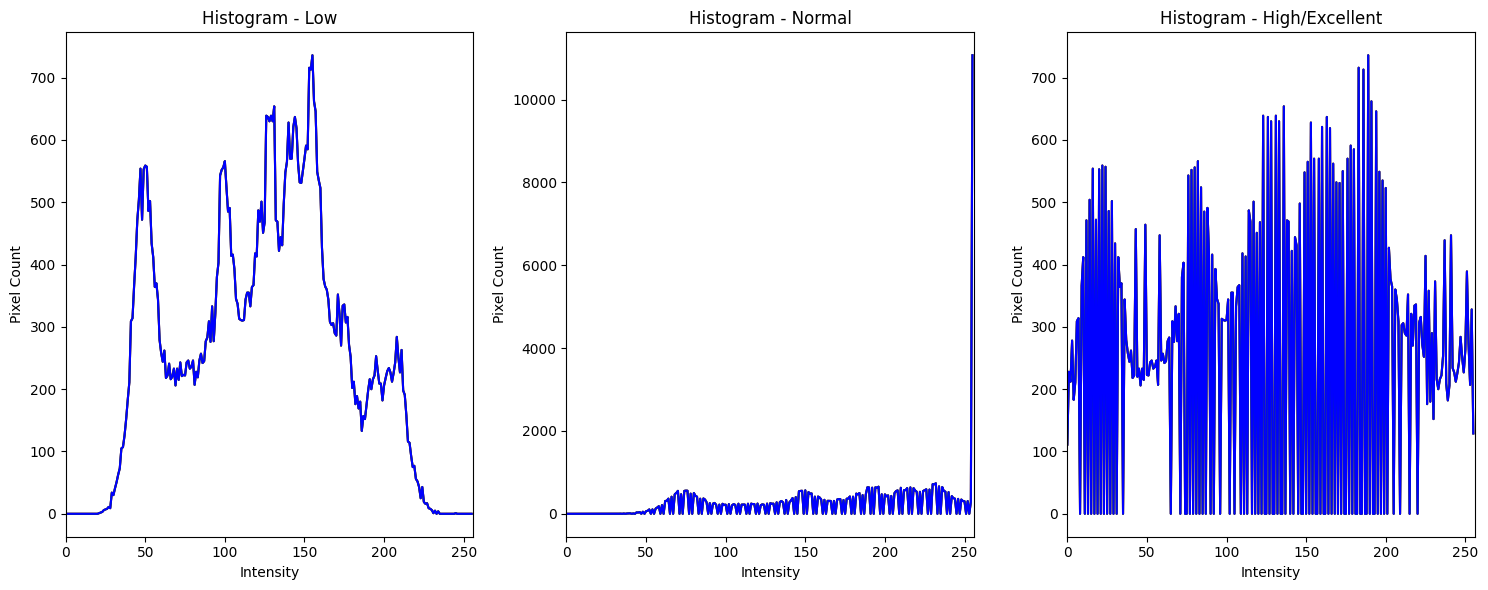

In [43]:
def plot_histograms(images, titles):
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(15,6))

    for i, img in enumerate(images):
        plt.subplot(1, 3, i+1)
        for j, col in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0,256])
            plt.plot(hist, color=col)
            plt.xlim([0,256])
        plt.title(f"Histogram - {titles[i]}")
        plt.xlabel("Intensity")
        plt.ylabel("Pixel Count")

    plt.tight_layout()
    plt.show()


plot_histograms(
    [img , normal_contrast, prefect_contrast],
    ["Low", "Normal", "High/Excellent"]
)
